In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/DA314_S8_EmployeeAttrition_Data_Practice.csv')

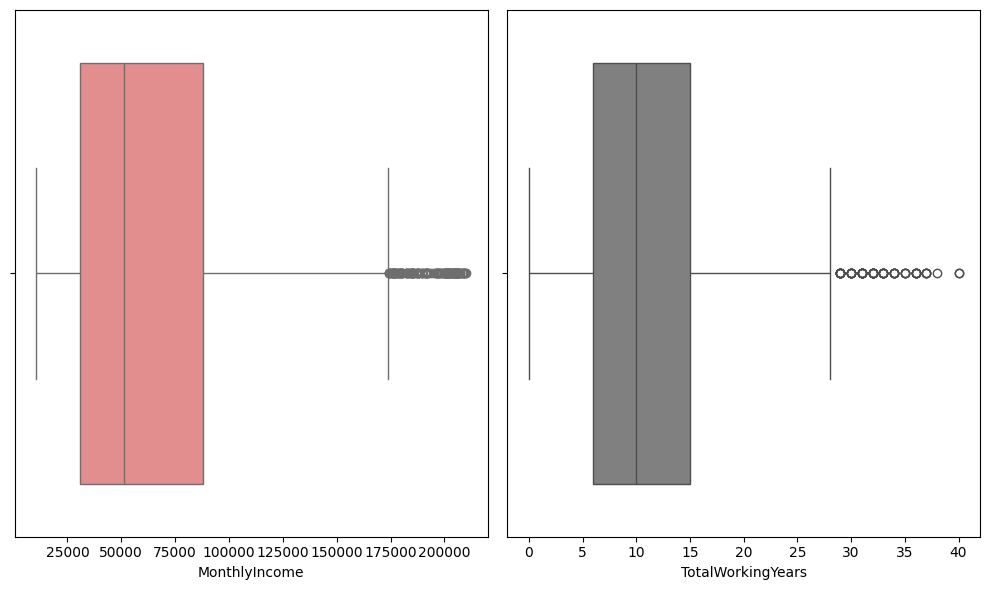

In [9]:
fig , aixs = plt.subplots(1,2, figsize=(10,6))

sns.boxplot(data= df , x = 'MonthlyIncome' , ax = aixs[0] , color = 'lightcoral')
sns.boxplot(data= df , x = 'TotalWorkingYears' , ax = aixs[1] , color = 'grey')
plt.tight_layout()

<Axes: xlabel='YearsAtCompany'>

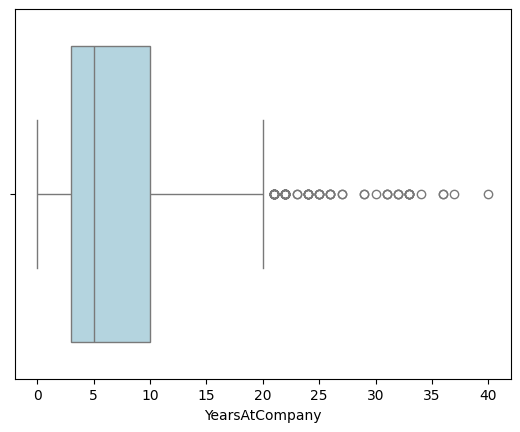

In [11]:
sns.boxplot(data = df , x = 'YearsAtCompany' , color = 'lightblue')


<Axes: xlabel='MonthlyIncome_capped'>

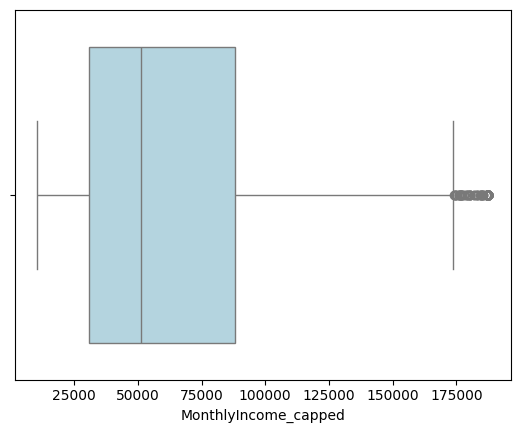

In [19]:
percentile_95 = df['MonthlyIncome'].quantile(0.95)
df['MonthlyIncome_capped'] = df['MonthlyIncome'].apply(lambda x: percentile_95 if x > percentile_95 else x)
sns.boxplot(data = df , x = 'MonthlyIncome_capped' , color = 'lightblue')


## Outlier Detection using IQR Method for YearsAtCompany

In [16]:
# Apply IQR method to detect outliers in YearsAtCompany
Q1 = df['YearsAtCompany'].quantile(0.25)
Q3 = df['YearsAtCompany'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = (df['YearsAtCompany'] < lower_bound) | (df['YearsAtCompany'] > upper_bound)
outlier_count = outliers.sum()

print("=" * 60)
print("IQR METHOD - YEARS AT COMPANY OUTLIER ANALYSIS")
print("=" * 60)
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower Boundary: {lower_bound}")
print(f"Upper Boundary: {upper_bound}")
print(f"\nTotal outliers detected: {outlier_count}")
print(f"Percentage of outliers: {(outlier_count / len(df) * 100):.2f}%")
print("\nOutlier values:")
print(df[outliers]['YearsAtCompany'].sort_values(ascending=False).unique())

IQR METHOD - YEARS AT COMPANY OUTLIER ANALYSIS
Q1 (25th percentile): 3.0
Q3 (75th percentile): 10.0
Interquartile Range (IQR): 7.0
Lower Boundary: -7.5
Upper Boundary: 20.5

Total outliers detected: 76
Percentage of outliers: 4.53%

Outlier values:
[40 37 36 34 33 32 31 30 29 27 26 25 24 23 22 21]


## Comprehensive Summary: Employee Data Analysis & Insights

In [18]:
# Generate comprehensive summary statistics combining all analyses
summary_report = {
    'Employee Tenure Patterns': {
        'Total Employees': len(df),
        'Average Years at Company': round(df['YearsAtCompany'].mean(), 2),
        'Median Years at Company': round(df['YearsAtCompany'].median(), 2),
        'Max Years at Company': df['YearsAtCompany'].max(),
        'Min Years at Company': df['YearsAtCompany'].min(),
        'Tenure Outliers (IQR)': int(outlier_count),
        'Outlier Percentage': round((outlier_count / len(df) * 100), 2)
    },
    'Income Distribution Analysis': {
        'Average Monthly Income': f"${df['MonthlyIncome'].mean():,.2f}",
        'Median Monthly Income': f"${df['MonthlyIncome'].median():,.2f}",
        'Max Monthly Income': f"${df['MonthlyIncome'].max():,.2f}",
        'Min Monthly Income': f"${df['MonthlyIncome'].min():,.2f}",
        '95th Percentile Cap': f"${percentile_95:,.2f}",
        'High Outliers (>95th %ile)': int((df['MonthlyIncome'] > percentile_95).sum())
    },
    'Experience Analysis': {
        'Average Total Working Years': round(df['TotalWorkingYears'].mean(), 2),
        'Median Total Working Years': round(df['TotalWorkingYears'].median(), 2),
        'Max Total Working Years': df['TotalWorkingYears'].max(),
        'Min Total Working Years': df['TotalWorkingYears'].min()
    }
}

print("\n" + "=" * 80)
print("STAKEHOLDER REPORT: EMPLOYEE DATA COMPREHENSIVE SUMMARY")
print("=" * 80)

for section, metrics in summary_report.items():
    print(f"\n📊 {section}")
    print("-" * 80)
    for key, value in metrics.items():
        print(f"   {key:<40} : {value}")

print("\n" + "=" * 80)
print("KEY INSIGHTS & RISK FACTORS")
print("=" * 80)

# Risk Factor Analysis
tenure_outlier_pct = (outlier_count / len(df)) * 100
high_earners = (df['MonthlyIncome'] > percentile_95).sum()
avg_experience = df['TotalWorkingYears'].mean()
avg_tenure = df['YearsAtCompany'].mean()

print(f"""
1. EMPLOYEE RETENTION RISKS:
   • Employees with unusual tenure patterns (outliers): {int(outlier_count)} ({tenure_outlier_pct:.1f}%)
   • These may represent either highly loyal long-tenure employees or recent hires
   • Action: Monitor these groups separately for attrition patterns

2. COMPENSATION INSIGHTS:
   • High earners (above 95th percentile): {int(high_earners)} employees
   • Income cap threshold for analysis: ${percentile_95:,.2f}
   • This reduces skewness for more reliable statistical modeling
   • Action: Consider separate salary tier analysis for strategic planning

3. EXPERIENCE & TENURE CORRELATION:
   • Average total working experience: {avg_experience:.1f} years
   • Average tenure at current company: {avg_tenure:.1f} years
   • Gap indicates: {avg_experience - avg_tenure:.1f} years of experience from other employers
   • This suggests a mobile workforce with industry experience

4. WORKFORCE PLANNING RECOMMENDATIONS:
   ✓ Monitor tenure outliers for early attrition warning signals
   ✓ Use income-capped metrics for predictive modeling stability
   ✓ Segment analysis by tenure groups for targeted HR strategies
   ✓ Consider experience level when planning succession strategies
""")

print("=" * 80)


STAKEHOLDER REPORT: EMPLOYEE DATA COMPREHENSIVE SUMMARY

📊 Employee Tenure Patterns
--------------------------------------------------------------------------------
   Total Employees                          : 1676
   Average Years at Company                 : 7.03
   Median Years at Company                  : 5.0
   Max Years at Company                     : 40
   Min Years at Company                     : 0
   Tenure Outliers (IQR)                    : 76
   Outlier Percentage                       : 4.53

📊 Income Distribution Analysis
--------------------------------------------------------------------------------
   Average Monthly Income                   : $68,423.63
   Median Monthly Income                    : $51,439.50
   Max Monthly Income                       : $209,990.00
   Min Monthly Income                       : $10,595.00
   95th Percentile Cap                      : $187,541.00
   High Outliers (>95th %ile)               : 83

📊 Experience Analysis
-------------